In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import PercentFormatter
mpl.rcParams['figure.dpi'] = 100

In [86]:
!python class_figures.py

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [2]:
# Settings
max_norm  = 16
results_dir = '../../exp_results/pn3-yolo'
max_query = 1000 # out of 5000
no_images = 1000 # out of 5000

In [43]:
# Clean dataset statistics
clean_stats = np.load(results_dir + '/clean_preds.npy')
names = clean_stats[0]
targets = clean_stats[1].astype(int)
clean_stats = clean_stats[2:].astype(float)

In [44]:
print(names)

['person' 'bicycle' 'car' 'motorcycle' 'airplane' 'bus' 'train' 'truck'
 'boat' 'traffic light' 'fire hydrant' 'stop sign' 'parking meter' 'bench'
 'bird' 'cat' 'dog' 'horse' 'sheep' 'cow' 'elephant' 'bear' 'zebra'
 'giraffe' 'backpack' 'umbrella' 'handbag' 'tie' 'suitcase' 'frisbee'
 'skis' 'snowboard' 'sports ball' 'kite' 'baseball bat' 'baseball glove'
 'skateboard' 'surfboard' 'tennis racket' 'bottle' 'wine glass' 'cup'
 'fork' 'knife' 'spoon' 'bowl' 'banana' 'apple' 'sandwich' 'orange'
 'broccoli' 'carrot' 'hot dog' 'pizza' 'donut' 'cake' 'chair' 'couch'
 'potted plant' 'bed' 'dining table' 'toilet' 'tv' 'laptop' 'mouse'
 'remote' 'keyboard' 'cell phone' 'microwave' 'oven' 'toaster' 'sink'
 'refrigerator' 'book' 'clock' 'vase' 'scissors' 'teddy bear' 'hair drier'
 'toothbrush']


In [73]:
chosen = 'broccoli'
name_ind = np.where(names == chosen)[0][0]
clean_class = [clean_stats[0][name_ind], clean_stats[1][name_ind], clean_stats[2][name_ind], clean_stats[3][name_ind]]

In [74]:
# Load and process data
for noise_f in ['gba', 'per']:#, 'ran']:
    save_path = results_dir + '/%s_%iN%iQ' % (noise_f, no_images, max_norm)
    
    # Load results
    entries = 8
    if noise_f == 'ran': entries = 5
    res = np.empty((0, entries))

    for trial in np.arange(99, max_query, 100):
        temp = np.load(save_path + '%.3i-%.3i.npy' % (trial - 99, trial))
        for entry in temp:
            tp = np.concatenate([np.array([entry[0][0], entry[1][0], entry[2][0], entry[3][0]]), entry[4:].astype(np.float)])
            res = np.concatenate([res, tp.reshape((1, 8))])

    # Create dataframe
    results = pd.DataFrame(res)

    if noise_f == 'gba':
        results.columns = ['Precision', 'Recall', 'mAP', 'F1', 'sigma', 'theta', 'lambd', 'sides']
        results['sides'] = results['sides'].astype(int)
        gba_class = results
        
    if noise_f == 'per':
        results.columns = ['Precision', 'Recall', 'mAP', 'F1', 'freq_x', 'freq_y', 'freq_sine', 'octave']
        results['octave'] = results['octave'].astype(int)
        per_class = results
        
    if noise_f == 'ran': results.columns = ['mPrecision', 'mRecall', 'mAP', 'mF1', 'seed']
        #ran_class = results

In [75]:
# Print format
pf = '%20s' + '%10.4g' * 5
def show_stats(stats):
    print(pf % ('all', targets.sum(), stats[0].mean(), stats[1].mean(), stats[2].mean(), stats[3].mean()))
    for i, c in enumerate(names):
        print(pf % (c, targets[i], stats[0][i], stats[1][i], stats[2][i], stats[3][i]))

In [76]:
show_stats(clean_stats)

                 all      6851    0.1059    0.7783     0.583    0.1808
              person      2089    0.1383    0.8593    0.7251    0.2382
             bicycle        39   0.05676    0.5385    0.3822    0.1027
                 car       296   0.07036    0.8243    0.6103    0.1296
          motorcycle        88     0.142    0.8409    0.7173     0.243
            airplane        14    0.1368     1.143         1    0.2443
                 bus        54    0.1877     0.963    0.9151    0.3142
               train        54    0.2379    0.9074    0.8719    0.3769
               truck        64    0.1096    0.6094    0.4361    0.1857
                boat        68   0.07895    0.7941    0.5248    0.1436
       traffic light        89    0.0404    0.7303    0.5597   0.07656
        fire hydrant        21    0.2381    0.9524    0.9002     0.381
           stop sign        18   0.09143    0.8889    0.8051    0.1658
       parking meter        13   0.02759    0.3077    0.1976   0.05063
      

In [77]:
gba_class.head(n = 7)

,Precision,Recall,mAP,F1,sigma,theta,lambd,sides
0,0.136260,0.797989,0.631402,0.232772,0.851323,1.586558,0.669672,5
1,0.126686,0.813787,0.630644,0.219242,0.235567,0.156767,0.963778,8
2,0.131010,0.806127,0.627135,0.225390,0.758183,0.466708,0.697986,6
3,0.130631,0.816180,0.646692,0.225216,0.633825,2.112887,0.687387,1
4,0.131714,0.809957,0.633686,0.226582,0.955126,1.497800,0.783389,4
5,0.132656,0.793202,0.621870,0.227298,0.260247,1.877613,0.649938,4
6,0.149657,0.793202,0.638948,0.251805,0.154278,1.439714,0.409155,4


In [78]:
gba_class.describe()

,Precision,Recall,mAP,F1,sigma,theta,lambd,sides
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.137135,0.805727,0.633415,0.234145,0.506391,1.531379,0.497047,4.368000
std,0.010099,0.018495,0.017119,0.014207,0.288163,0.906668,0.288094,2.245355
min,0.117038,0.622307,0.434681,0.204896,0.001738,0.000472,0.000424,1.000000
25%,0.128500,0.794639,0.627096,0.221891,0.268580,0.716335,0.253691,2.000000
50%,0.135347,0.807563,0.632127,0.231997,0.494594,1.538516,0.503847,4.000000
75%,0.145983,0.818095,0.642595,0.246766,0.764055,2.300811,0.756665,6.000000
max,0.172208,0.845859,0.671204,0.279993,0.999964,3.141523,0.999020,8.000000


In [79]:
per_class.describe()

,Precision,Recall,mAP,F1,freq_x,freq_y,freq_sine,octave
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.150512,0.769267,0.596092,0.250679,0.506391,0.487453,0.497047,2.488000
std,0.017477,0.048976,0.047265,0.022067,0.288163,0.288601,0.288094,1.123886
min,0.113372,0.639062,0.483508,0.199932,0.001738,0.000150,0.000424,1.000000
25%,0.136274,0.734203,0.561037,0.233107,0.268580,0.228017,0.253691,1.000000
50%,0.152194,0.774773,0.597246,0.254215,0.494594,0.489725,0.503847,2.000000
75%,0.164280,0.809119,0.630735,0.268326,0.764055,0.732371,0.756665,4.000000
max,0.188622,0.865007,0.709918,0.292787,0.999964,0.999978,0.999020,4.000000


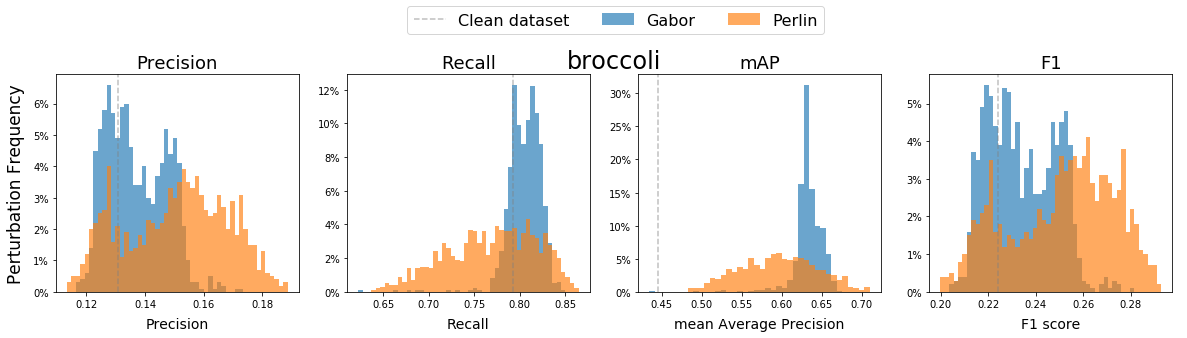

In [82]:
#xlim = (0.2, 1.0)
#ylim = (0, 0.145)

fig = plt.figure(figsize = (20, 4))
plt.subplots_adjust(wspace = 0.2)
plt.title(chosen, fontsize = 24)
plt.axis('off')


num_bins = 50
ax = fig.add_subplot(1, 4, 1)
a = gba_class['Precision']
b = per_class['Precision']
#c = ran_class['ev-T_in3']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('Precision', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.set_ylabel('Perturbation Frequency', size = 17, labelpad = 8)
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('Precision', size = 14, labelpad = 8)
#ax.axvline(x = 0.1, color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_class[0], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

num_bins = 50
ax = fig.add_subplot(1, 4, 2)
a = gba_class['Recall']
b = per_class['Recall']
#c = ran_class['ev-T_in3']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('Recall', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('Recall', size = 14, labelpad = 8)
#ax.axvline(x = 0.1, color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_class[1], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)


num_bins = 40
ax = fig.add_subplot(1, 4, 3)
a = gba_class['mAP']
b = per_class['mAP']
#c = ran_class['ev-T_in3']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('mAP', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('mean Average Precision', size = 14, labelpad = 8)
#ax.axvline(x = 0.1, color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_class[2], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)


num_bins = 50
ax = fig.add_subplot(1, 4, 4)
a = gba_class['F1']
b = per_class['F1']
#c = ran_class['ev-T_in3']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('F1', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('F1 score', size = 14, labelpad = 8)
#ax.axvline(x = 0.1, color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_class[3], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

plt.legend(fontsize = 16, bbox_to_anchor=(-0.4, 1.35), ncol = 3)
plt.savefig('figures/%i_%s.png' % (name_ind, chosen), dpi = 300, bbox_inches = 'tight')